In [1]:
# task 2 - SVM

In [2]:
%%bash
# pip3 install tensorflow # please uncomment for first time
# pip3 install keras
# pip3 install seaborn

In [35]:
# Import the needed packages
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# For CNN layers and model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# For SVC
from sklearn.svm import SVC


# dont show warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")


%matplotlib inline

In [4]:
# declare glabal variables
(x_train, y_train, x_test, y_test) = [0 ,0 ,0 , 0]
model = False


In [5]:
def load_data() :
    # Get mnist data set and split to train and test
    global x_train, y_train, x_test, y_test
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    print(type(x_train))
    

In [6]:
def pre_process_data() :
    # Reshape the datasets from 3 dim to 4 dim - required
    global x_train, y_train, x_test, y_test

    # x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    # x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
    

In [7]:
def normalize_data() :
    # Convert to float
    global x_train, y_train, x_test, y_test

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # Normalize the RGB codes - Divide by 255
    x_train /= 255
    x_test /= 255
    x_train.shape
    

In [12]:
def visualaize_train_data() :
    global y_train
    x = y_train.reshape(-1,1)
    df = pd.DataFrame.from_records(x)
    df.columns = [ 'label']
    # print(df['label'].value_counts()) # Frequency distribution
    sns.countplot(df['label'])
    

<class 'numpy.ndarray'>
(60000, 28, 28)


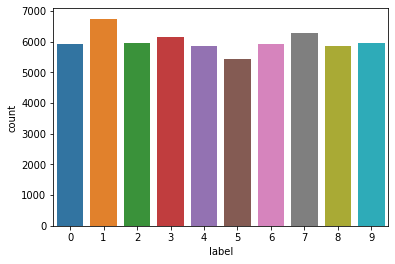

In [13]:
# RUN 

# 1 - Load Data
load_data()

# 2 - Preprocess data
pre_process_data()

# 3 - Normalize data
normalize_data()

# 4 - Visualize data
visualaize_train_data()


# 4 - create model
# create_model()

# 5 - train model with x_train, y_train
# train_model()

# 6 - evaluate model
# evaluate_model()


print(x_train.shape)



In [21]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train.reshape(60000, 784), y_train)

# predict using x_test
y_pred = model_linear.predict(x_test.reshape(10000, 784))

In [25]:
x_test.reshape(10000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy:", accuracy, 'Percentage:' , accuracy * 100)

# cm
print('Confusion matrix:')
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9404 Percentage: 94.04
Confusion matrix:
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]
